# Ethereum Price Prediction Model Goal

As a crypto enthusiast and Eth inverstor myself, I always found cryptocurrencies interesting from an analytic perspective. After all they seem to be unforgivingly volatile, but one realises that it's possible to see patterns in the way they appreciate in value or decrease.

The goal of this project is to make a Machine Learning model to predict this patterns and make a Price prediction for the next day and forecast what the price would possibly be like in the comming days.

## Exploratory Data Analysis (EDA)

In [68]:
import pandas as pd
import numpy as np

In [69]:
df = pd.read_csv("Ethereum Historical Data6.csv")

In [70]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,04/08/2024,"3,569.99","3,454.17","3,571.52","3,409.58",310.77K,3.35%
1,04/07/2024,"3,454.17","3,351.99","3,459.43","3,344.89",217.80K,3.05%
2,04/06/2024,"3,352.03","3,317.84","3,394.80","3,307.23",190.08K,1.03%
3,04/05/2024,"3,317.84","3,327.45","3,344.17","3,212.89",359.70K,-0.29%
4,04/04/2024,"3,327.45","3,310.82","3,435.57","3,254.31",371.23K,0.51%


In [71]:
df.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,2952,2952,2952,2952,2952,2944,2952
unique,2952,2837,2828,2832,2824,2397,1385
top,04/08/2024,10.16,10.16,10.16,10.16,1.09M,0.00%
freq,1,9,8,7,7,10,14


### Changing the features so that they are only numbers and changing date column type to *datetime*

In [72]:
adf = df.copy()

adf['Date'] = pd.to_datetime(adf['Date'])

adf = adf.sort_values(by=["Date"], ascending=True)

In [73]:
def adapt_vol(row):
    
    if row:

        if "K" in str(row):

            row = float(str(row).replace("K", ""))*1000

        elif "M" in str(row):

            row = float(str(row).replace("M", ""))*1_000_000

        elif "B" in str(row):

            row = float(str(row).replace("B", ""))*1_000_000_000

        else:

            row = float(row)
            
    else:
        
        row = row
        
    return row

def adapt_change(row):
    
    if row:

        row = float(row.replace("%", ""))/100
    else:
        
        row = row
        
    return row

def check_types(df_to_check:pd.DataFrame):
    
    for col in df_to_check.columns:
        
        print(f"Column {col} is from type: {df_to_check[col].dtype}\n")

In [74]:
adf["Vol."] = adf["Vol."].apply(adapt_vol)
adf["Change %"] = adf["Change %"].apply(adapt_change)

### Turning all the object type columns into floats

In [75]:
for col in adf.columns[1:5]:
    
    adf[col] = adf[col].str.replace(',', '') 
    
    adf[col] = adf[col].astype(float)

In [76]:
check_types(adf)

Column Date is from type: datetime64[ns]

Column Price is from type: float64

Column Open is from type: float64

Column High is from type: float64

Column Low is from type: float64

Column Vol. is from type: float64

Column Change % is from type: float64



In [77]:
adf.head()

,Date,Price,Open,High,Low,Vol.,Change %
2951,2016-03-10,11.75,11.20,11.85,11.07,0.0,0.0491
2950,2016-03-11,11.95,11.75,11.95,11.75,180.0,0.0170
2949,2016-03-12,12.92,11.95,13.45,11.95,830.0,0.0812
2948,2016-03-13,15.07,12.92,15.07,12.92,1300.0,0.1664
2947,2016-03-14,12.50,15.07,15.07,11.40,92180.0,-0.1705


### Graph of the different features over time:

to explore their correlation.

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
def graph_features_over_time(df):
    
    df.set_index('Date', inplace=True)
    plt.figure(figsize=(14, 8))
    
    print(df.head())
    
    atr = list(df.columns)
    atr.remove("Vol.")
    atr.remove("Change %")

    for i,column in enumerate(atr[1:]):
        plt.plot(df.index, df[column]/df[column].max(), label=column)
        
    plt.title('Ethereum Metrics Over Time')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

            Price   Open   High    Low     Vol.  Change %
Date                                                     
2016-03-10  11.75  11.20  11.85  11.07      0.0    0.0491
2016-03-11  11.95  11.75  11.95  11.75    180.0    0.0170
2016-03-12  12.92  11.95  13.45  11.95    830.0    0.0812
2016-03-13  15.07  12.92  15.07  12.92   1300.0    0.1664
2016-03-14  12.50  15.07  15.07  11.40  92180.0   -0.1705


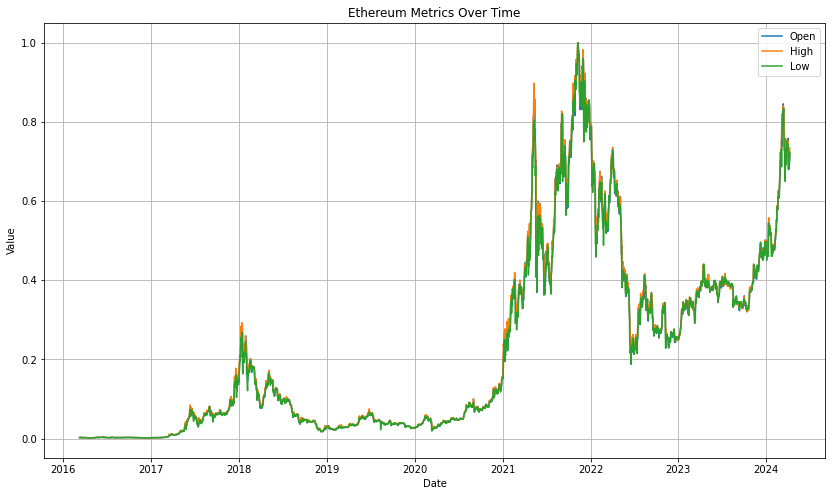

In [80]:
graph_features_over_time(adf)

### Trend Analysis

In [81]:
from sklearn.linear_model import LinearRegression

In [82]:
# Creating a time step feature

adf["time"] = range(len(adf))


In [83]:
def find_trend_of_feature(feature):
    
    X = adf.loc[:, ['time']]
    y = adf.loc[:, feature].fillna(0)

    model = LinearRegression()
    model.fit(X, y)

    y_pred = pd.Series(model.predict(X), index=X.index)
    
    return y_pred

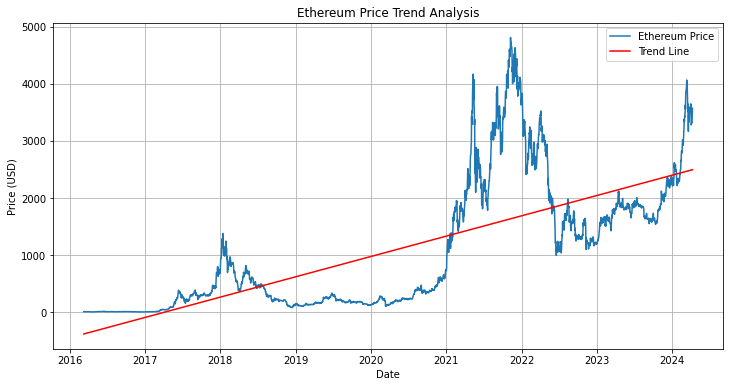

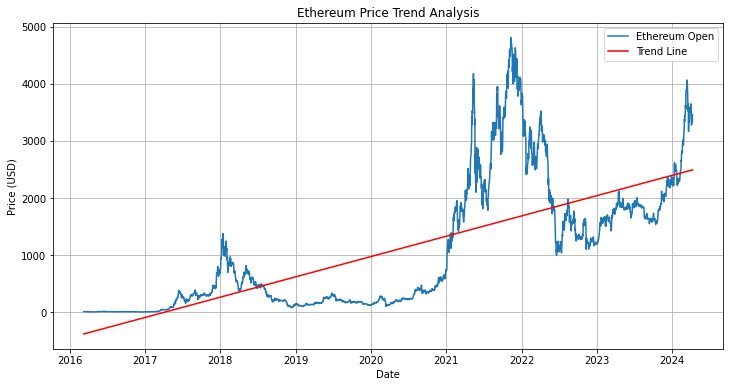

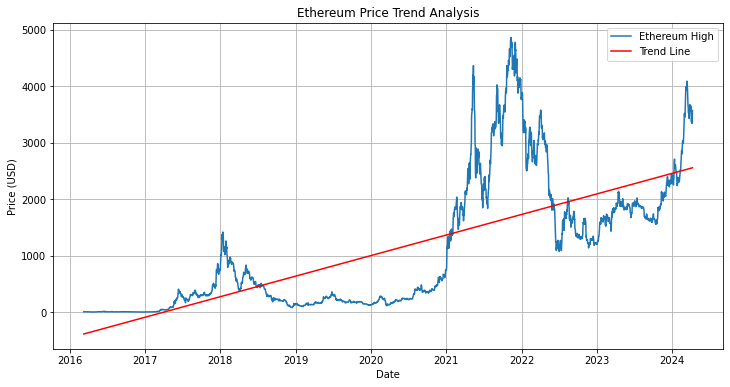

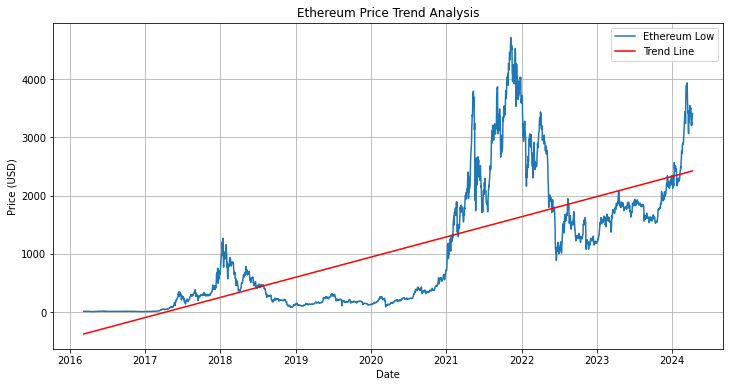

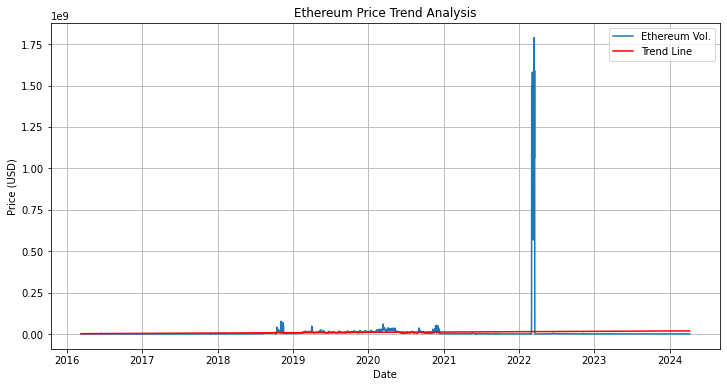

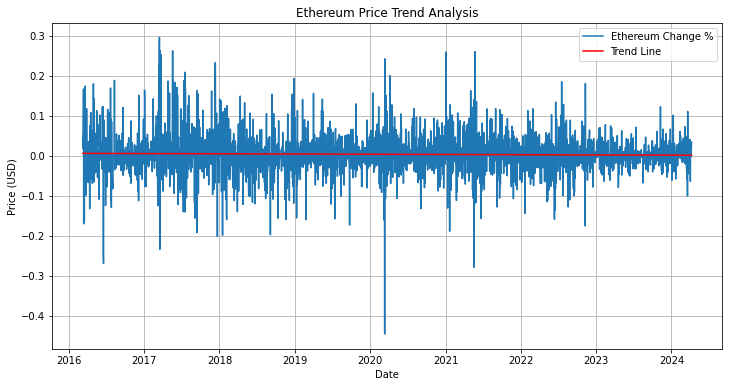

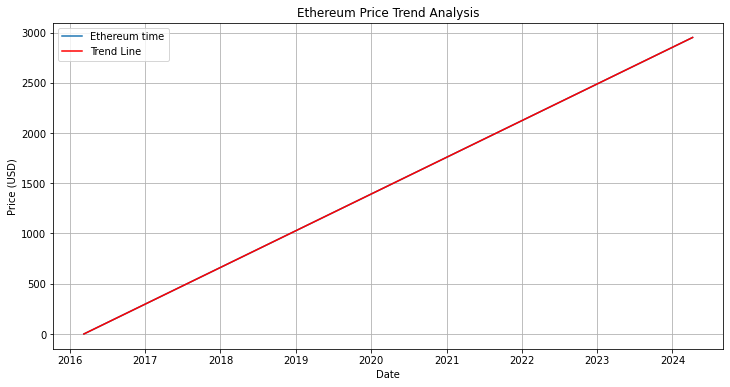

In [84]:
for column in adf.columns:
    
    y_pred = find_trend_of_feature(column)
    
    plt.figure(figsize=(12, 6))
    plt.plot(adf.index, adf[column], label=f'Ethereum {column}')
    plt.plot(adf.index, y_pred, label='Trend Line', color='red')
    plt.title('Ethereum Price Trend Analysis')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

## Analyse relationship with previous values (lags):

In [85]:
adf_copy = adf.copy()

In [86]:
def find_lags_of_feature(feature, n_lag):
    
    adf_copy[f"{feature}_lag_{n_lag}"] = adf_copy[feature].shift(n_lag)
    
    X = adf_copy.loc[:, [f"{feature}_lag_{n_lag}"]]
    X.dropna(inplace=True)
    y = adf_copy.loc[:, feature]
    y, X = y.align(X, join='inner')

    return X, y

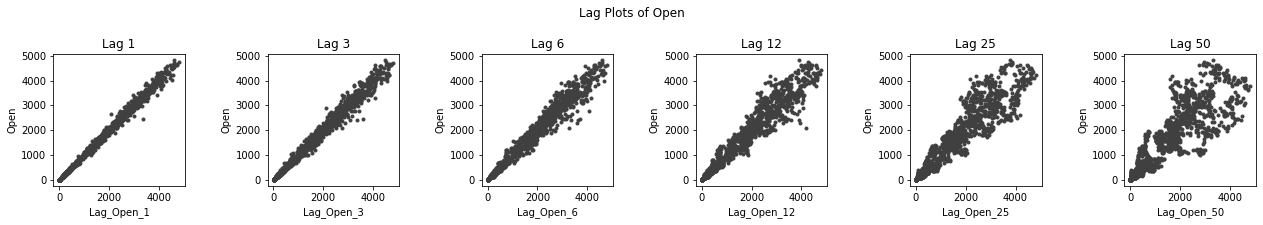

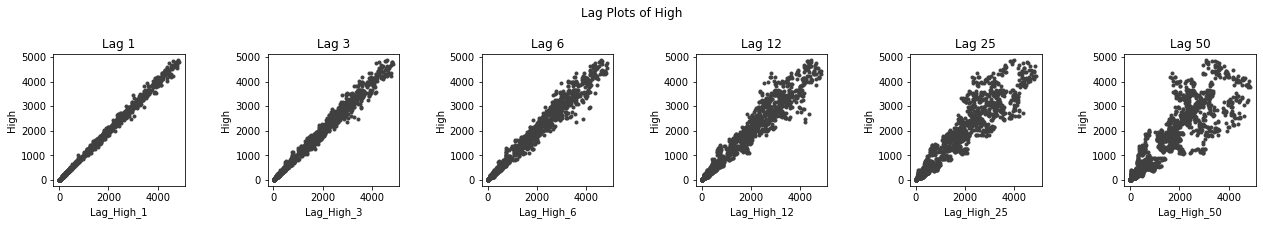

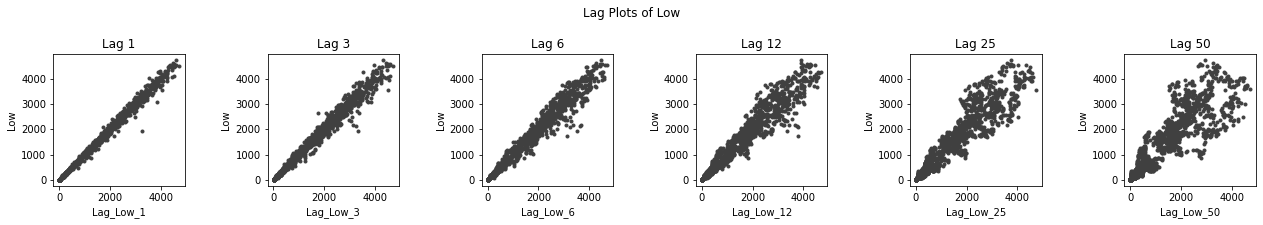

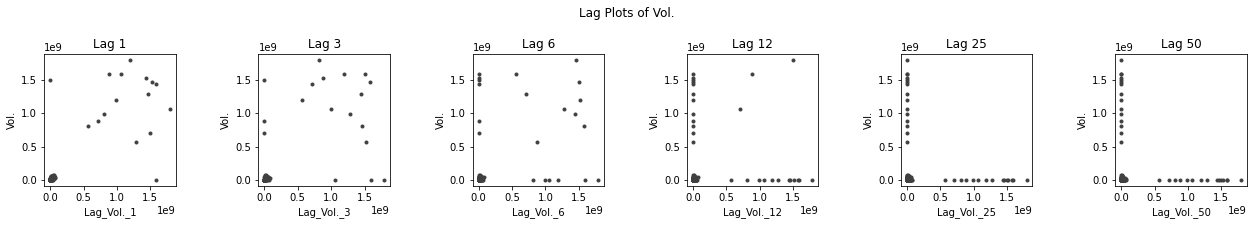

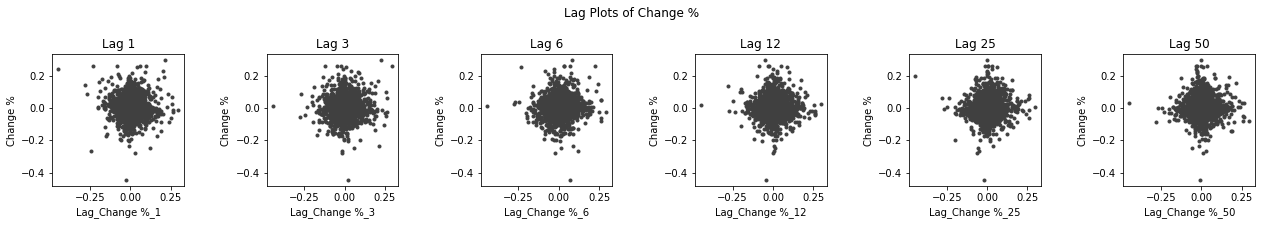

In [87]:
for column in adf.columns[1:-1]:
    
    try:

        fig, axs = plt.subplots(1, 6, figsize=(18, 3))
        fig.suptitle(f'Lag Plots of {column}')

        for i, n in enumerate([1, 3, 6, 12, 25, 50]):

            X, y = find_lags_of_feature(column, n)

            ax = axs[i]

            ax.plot(X[f"{column}_lag_{n}"], y, '.', color='0.25')
            ax.set_aspect('equal')
            ax.set_ylabel(column)
            ax.set_xlabel(f'Lag_{column}_{n}')
            ax.set_title(f'Lag {n}')
            
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()
            
    except Exception as e:

        continue

### Checking long term changes with moving averages

In [88]:
moving_average = adf["Open"].rolling(
    window=365,       # 365-day window
    center=True,      # puts the average at the center of the window
    min_periods=183,  # choose about half the window size
).mean()              # compute the mean (could also do median, std, min, max, ...)

moving_average

Date
2016-03-10      11.545847
2016-03-11      11.545326
2016-03-12      11.546270
2016-03-13      11.549409
2016-03-14      11.550749
                 ...     
2024-04-04    2488.771551
2024-04-05    2493.299301
2024-04-06    2498.065351
2024-04-07    2502.725543
2024-04-08    2507.474973
Name: Open, Length: 2952, dtype: float64

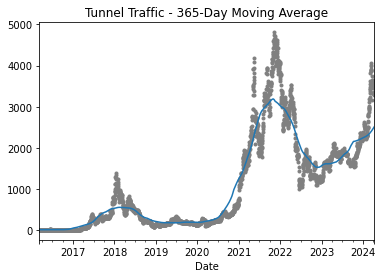

In [89]:
ax = adf["Open"].plot(style=".", color="0.5")
moving_average.plot(
    ax=ax, linewidth=1.5, title="Tunnel Traffic - 365-Day Moving Average", legend=False,
);

## Feature engineering

In [90]:
from sklearn.preprocessing import MinMaxScaler

In [91]:
scaler = MinMaxScaler()

final_df = adf[["Open"]]

scaled_df = scaler.fit_transform(final_df)

final_df = pd.DataFrame(scaled_df, index=adf.index, columns=["Open"])

In [92]:
final_df

,Open
Date,
2016-03-10,0.000941
2016-03-11,0.001056
2016-03-12,0.001098
2016-03-13,0.001300
2016-03-14,0.001747
...,...
2024-04-04,0.688125
2024-04-05,0.691588
2024-04-06,0.689587


## Model: LSTM Neural Network

In [93]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

### Creating a function to test NN model with different amount of lags

In [94]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [95]:
def preprocess(lags, df:pd.DataFrame) -> tuple[np.ndarray]:

    data = final_df["Open"].values.reshape(-1,1)

    X=[]
    y=[]

    for i in range(lags, len(data)):

        X.append(data[i-lags:i, 0]) 
        y.append(data[i, 0])

    X_tr, X_te, y_tr, y_te = np.array(X[:]), np.array([]), np.array(y[:]), np.array([])

    return X_tr, X_te, y_tr, y_te

def create_model(lags, X_tr:np.ndarray, y_tr:np.ndarray):

    model = Sequential()
    model.add(LSTM(units=30, return_sequences=True, input_shape=(lags, 1)))
    model.add(Dropout (0.25))
    model.add(LSTM(units=30,return_sequences=True))
    model.add(Dropout (0.25))
    model.add(LSTM(units=30))
    model.add(Dropout (0.2))
    model.add(Dense(units=1))

    model.compile(optimizer="adam", loss="mean_squared_error")
    model.fit(X_tr, y_tr, epochs=20, batch_size=20)

    return model

def test_and_graph(model, X_te:np.ndarray, y_te:np.ndarray, lags:int) -> None:

    y_pred = model.predict(X_te)
    
    print(f"lags: {lags}")
    print(f"MAE: {mean_absolute_error(y_te, y_pred)}")
    print(f"MSE: {mean_squared_error(y_te, y_pred)}")
    
    plt.plot(y_te, label="REAL")
    plt.plot(y_pred,label="PREDICTED")
    plt.xlabel("DATE")
    plt.ylabel("VALUE")
    plt.title("Comparison")
    plt.legend()
    plt.show()
    
    print("\n")

In [96]:
def test_lags_prediction(df: pd.DataFrame(), lags:int) -> float:
    
    X_tr, X_te, y_tr, y_te = preprocess(lags, df)

    model = create_model(lags, X_tr, y_tr)

    test_and_graph(model, X_te, y_te, lags)

In [97]:
for lags in [1, 3, 6, 12, 24, 36, 50]:
    
    test_lags_prediction(final_df, lags)
    

Epoch 1/20
148/148 [==============================] - 7s 5ms/step - loss: 0.0428
Epoch 2/20
148/148 [==============================] - 1s 5ms/step - loss: 0.0044
Epoch 3/20
148/148 [==============================] - 1s 6ms/step - loss: 0.0034
Epoch 4/20
148/148 [==============================] - 1s 7ms/step - loss: 0.0025
Epoch 5/20
148/148 [==============================] - 1s 6ms/step - loss: 0.0024
Epoch 6/20
148/148 [==============================] - 1s 5ms/step - loss: 0.0025
Epoch 7/20
148/148 [==============================] - 1s 6ms/step - loss: 0.0022
Epoch 8/20
148/148 [==============================] - 1s 5ms/step - loss: 0.0022
Epoch 9/20
148/148 [==============================] - 1s 8ms/step - loss: 0.0020
Epoch 10/20
148/148 [==============================] - 1s 6ms/step - loss: 0.0020
Epoch 11/20
148/148 [==============================] - 1s 6ms/step - loss: 0.0019
Epoch 12/20
148/148 [==============================] - 1s 5ms/step - loss: 0.0019
Epoch 13/20
148/148 [====

ValueError: Unexpected result of `predict_function` (Empty batch_outputs). Please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.

In [101]:
lags = 36

X_tr, X_te, y_tr, y_te = preprocess(lags, final_df)

model = create_model(lags, X_tr, y_tr)

Epoch 1/20
146/146 [==============================] - 13s 32ms/step - loss: 0.0069
Epoch 2/20
146/146 [==============================] - 5s 34ms/step - loss: 0.0032
Epoch 3/20
146/146 [==============================] - 5s 32ms/step - loss: 0.0025
Epoch 4/20
146/146 [==============================] - 5s 31ms/step - loss: 0.0024
Epoch 5/20
146/146 [==============================] - 5s 32ms/step - loss: 0.0024
Epoch 6/20
146/146 [==============================] - 4s 31ms/step - loss: 0.0022
Epoch 7/20
146/146 [==============================] - 4s 31ms/step - loss: 0.0019
Epoch 8/20
146/146 [==============================] - 4s 31ms/step - loss: 0.0019
Epoch 9/20
146/146 [==============================] - 4s 31ms/step - loss: 0.0020
Epoch 10/20
146/146 [==============================] - 5s 32ms/step - loss: 0.0018
Epoch 11/20
146/146 [==============================] - 5s 31ms/step - loss: 0.0016
Epoch 12/20
146/146 [==============================] - 5s 31ms/step - loss: 0.0016
Epoch 13/20



## Creating a function to see how well this model forcasts the price of ETH

### First predicting ETH price one day after the last day of the dataset

In [102]:
last_day_dataset = final_df.sort_index().index[-1]
last_day_dataset

Timestamp('2024-04-08 00:00:00')

In [103]:
from datetime import datetime
from datetime import timedelta

In [104]:
data = final_df["Open"].values.reshape(-1,1)

X_day_after = []

X_day_after.append(data[len(data)-lags:len(data), 0]) #All the previous values to the last day

X_day_after = np.array(X_day_after[:])

day_y = model.predict(X_day_after)

1/1 [==============================] - 1s 1s/step


In [105]:
X_day_after

array([[0.7251638 , 0.75384555, 0.73917354, 0.79303408, 0.80431976,
        0.80732913, 0.81190463, 0.80634406, 0.84522228, 0.82734304,
        0.83254958, 0.80701674, 0.7777477 , 0.73245086, 0.75767339,
        0.73175527, 0.65777044, 0.73059109, 0.72604266, 0.69299159,
        0.69271669, 0.71822453, 0.74639604, 0.7457421 , 0.72761295,
        0.73990037, 0.72955603, 0.72894374, 0.75815447, 0.72811486,
        0.68129147, 0.68812452, 0.69158791, 0.68958652, 0.69669864,
        0.71797878]])

In [132]:
print(f"ETH price predicted for {last_day_dataset+timedelta(days=1)} is: ${scaler.inverse_transform(day_y)[0, 0]}")

ETH price predicted for 2024-04-09 00:00:00 is: $3350.547119140625


And the actual price for that date was: **$ 3,695.34** (Coinmarketcap)

In [124]:
def forecast_days(days_to_predict:int, n_lags_values:list, last_date:datetime) -> pd.DataFrame:
    
    X_fore = np.array(n_lags_values).reshape(1, -1)

    forecasted_prices_scaled = []

    forecasted_prices_unscaled = [] 

    for _ in range(days_to_predict):
        predicted_price_unscaled = model.predict(X_fore)
        
        predicted_price_scaled = scaler.inverse_transform(predicted_price_unscaled)
        
        forecasted_prices_scaled.append(predicted_price_scaled[0, 0])

        forecasted_prices_unscaled.append(predicted_price_unscaled[0, 0])
        
        X_fore = np.append(X_fore[:, 1:], predicted_price_unscaled.reshape(1, -1), axis=1)

        last_date = last_date + timedelta(days=1)

    return forecasted_prices_scaled

    

In [125]:
forecasting_days = 30

In [126]:
last_values = final_df["Open"].values[len(final_df)-lags-forecasting_days:len(final_df)-forecasting_days]

forecast = forecast_days(forecasting_days, last_values, last_day_dataset)

1/1 [==============================] - 0s 26ms/step


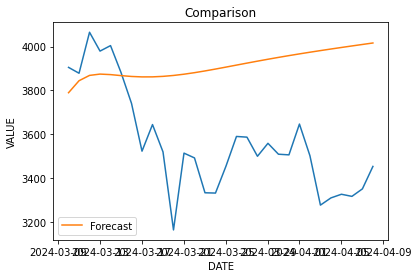

In [127]:
df_last_n_days = final_df[len(final_df)-forecasting_days:]

forecast = pd.DataFrame(forecast, index=df_last_n_days.index, columns=df_last_n_days.columns)

df_last_n_days = pd.DataFrame(scaler.inverse_transform(df_last_n_days), columns=df_last_n_days.columns, index=df_last_n_days.index)

plt.plot(df_last_n_days)
plt.plot(forecast, label="Forecast")
plt.xlabel("DATE")
plt.ylabel("VALUE")
plt.title("Comparison")
plt.legend()
plt.show()